# Import libraries and define root directory

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

root = "//data/becker/dopl4670/TDSE_Jobs/Project/Frequency_Sweep/freeman_resonance/"

data_1 = np.load(root+"400nm_1.8/PES_files/PES.npy")
data_2 = np.load(root+"400nm_2/PES_files/PES.npy")
data_3 = np.load(root+"400nm_2.2/PES_files/PES.npy")

E = np.load(root+"400nm_2.2/PES_files/E_range.npy")
t = np.load(root+"400nm_2.2/TDSE_files/t_total.npy")
dt = t[1]-t[0]




# Plot of PES for each job near ATI peaks and sub-structure peaks

Shift in peak 1:  0.010000000000000009
Shift in peak 1:  0.009999999999999995
Shift in peak 2:  0.010000000000000009
Shift in peak 2:  0.010000000000000009


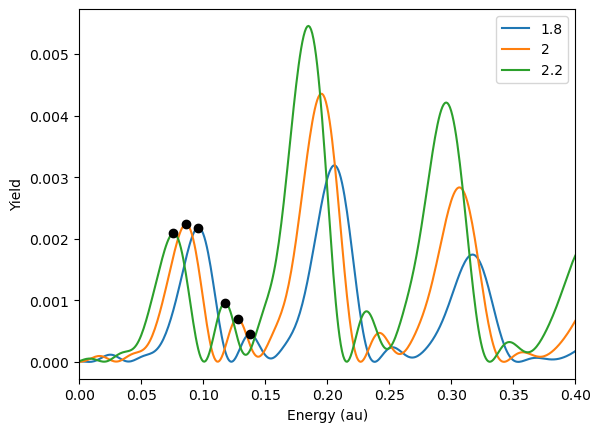

In [9]:

plt.plot(E, data_1, label="1.8")
plt.plot(E, data_2, label="2")
plt.plot(E, data_3, label="2.2")
plt.xlim([0,0.4])

peaks_data_1,_ = find_peaks(data_1)
peaks_data_2,_ = find_peaks(data_2)
peaks_data_3,_ = find_peaks(data_3)

plt.xlabel("Energy (au)")
plt.ylabel("Yield")

plt.plot(E[peaks_data_1[1]], data_1[peaks_data_1[1]], 'o',color = "k")
plt.plot(E[peaks_data_2[1]], data_2[peaks_data_2[1]], 'o',color = "k")
plt.plot(E[peaks_data_3[1]], data_3[peaks_data_3[1]], 'o',color = "k")

plt.plot(E[peaks_data_1[2]], data_1[peaks_data_1[2]], 'o',color = "k")
plt.plot(E[peaks_data_2[2]], data_2[peaks_data_2[2]], 'o',color = "k")
plt.plot(E[peaks_data_3[2]], data_3[peaks_data_3[2]], 'o',color = "k")

plt.legend()

print("Shift in peak 1: ", E[peaks_data_1[1]]-E[peaks_data_2[1]])
print("Shift in peak 1: ", E[peaks_data_2[1]]-E[peaks_data_3[1]])

print("Shift in peak 2: ", E[peaks_data_1[2]]-E[peaks_data_2[2]])
print("Shift in peak 2: ", E[peaks_data_2[2]]-E[peaks_data_3[2]])




# Prediction of peaks for Job 1

[(0.08535031686278227, 6), (0.19935031686278226, 7), (0.31335031686278225, 8)]


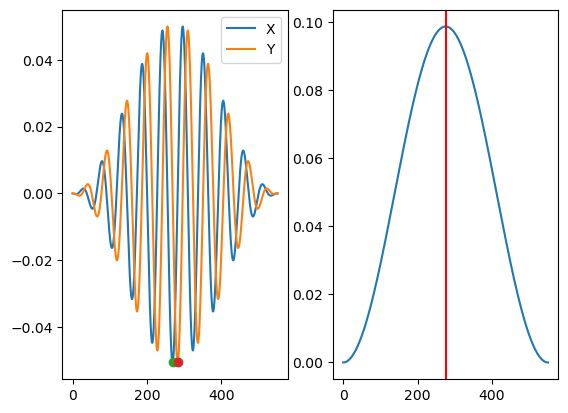

In [44]:
fig,(ax1,ax2) = plt.subplots(1,2,sharex=True)

top = 1


Ax = np.load(root+"400nm_1.8/TDSE_files/Ax.npy")
Ay = np.load(root+"400nm_1.8/TDSE_files/Ay.npy")

Ex = -np.gradient(Ax, dt)
Ey = -np.gradient(Ay, dt)


peak_indices_x, _ = find_peaks(np.abs(Ex)) 
peak_indices_y, _ = find_peaks(np.abs(Ey)) 


Ex_peaks_mag = np.abs(Ex[peak_indices_x]) 
Ey_peaks_mag = np.abs(Ey[peak_indices_y]) 


top_indices_x = np.argsort(Ex_peaks_mag)[-top:][::-1]
top_indices_y = np.argsort(Ey_peaks_mag)[-top:][::-1]




top_original_indices_x =np.sort(peak_indices_x[top_indices_x])
top_original_indices_y =np.sort(peak_indices_y[top_indices_y])


ax1.plot(t,Ex,label = "X") 
ax1.plot(t,Ey,label = "Y") 
ax1.plot(t[top_original_indices_x], Ex[top_original_indices_x], 'o') 
ax1.plot(t[top_original_indices_y ], Ey[top_original_indices_y ], 'o') 
ax1.legend()



Ip = 0.5
N = 10
wavelength = 400
w = 0.057 * 800/wavelength
I = 1.8e14 / 3.51E16

tau = 2*np.pi * N/w
envelope = np.sin(np.pi*t/tau)**2
I_profile = I * envelope
Up = I_profile/(4*w**2)


E_test_1 = []

if True:
#for i in range(top):
    i = 0
    specific_peak = int((top_original_indices_x[i]+top_original_indices_y[i])/2)
    Up_val = Up[specific_peak]
    for i in range(15):
        E_temp = i * w - (Ip + Up_val)
        if E_temp>0 and E_temp<0.4:
          
            E_test_1.append((E_temp,i))

print(E_test_1)

ax2.plot(t,Up)
ax2.axvline(t[specific_peak], color='r')



    

# Prediction of peaks for Job 2

[(0.005729049877976622, 5), (0.11972904987797661, 6), (0.2337290498779766, 7), (0.3477290498779766, 8), (0.10373486704175916, 6), (0.21773486704175915, 7), (0.33173486704175914, 8), (0.09013879872291197, 6), (0.20413879872291196, 7), (0.31813879872291195, 8), (0.08025462917392179, 6), (0.19425462917392178, 7), (0.30825462917392177, 8), (0.07505158053097905, 6), (0.18905158053097904, 7), (0.303051580530979, 8), (0.0750467468213255, 6), (0.1890467468213255, 7), (0.3030467468213255, 8), (0.0802405749610674, 6), (0.1942405749610674, 7), (0.3082405749610674, 8), (0.0901168872832474, 6), (0.2041168872832474, 7), (0.3181168872832474, 8), (0.10373486704175905, 6), (0.21773486704175904, 7), (0.33173486704175903, 8), (0.005698278642424004, 5), (0.119698278642424, 6), (0.23369827864242398, 7), (0.347698278642424, 8)]


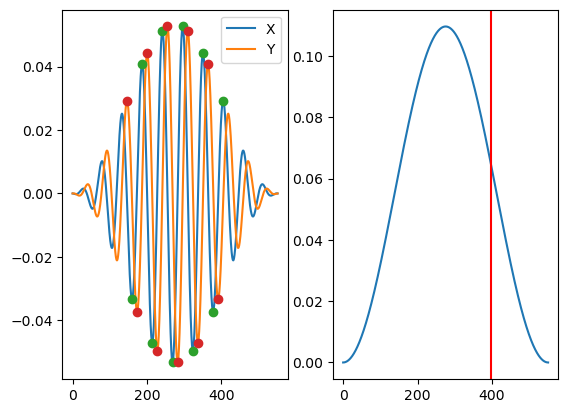

In [45]:
fig,(ax1,ax2) = plt.subplots(1,2,sharex=True)

top = 10


Ax = np.load(root+"400nm_2/TDSE_files/Ax.npy")
Ay = np.load(root+"400nm_2/TDSE_files/Ay.npy")

Ex = -np.gradient(Ax, dt)
Ey = -np.gradient(Ay, dt)


peak_indices_x, _ = find_peaks(np.abs(Ex))
peak_indices_y, _ = find_peaks(np.abs(Ey))


Ex_peaks_mag = np.abs(Ex[peak_indices_x])
Ey_peaks_mag = np.abs(Ey[peak_indices_y])


top_indices_x = np.argsort(Ex_peaks_mag)[-top:][::-1]
top_indices_y = np.argsort(Ey_peaks_mag)[-top:][::-1]




top_original_indices_x =np.sort(peak_indices_x[top_indices_x])
top_original_indices_y =np.sort(peak_indices_y[top_indices_y])


ax1.plot(t,Ex,label = "X")
ax1.plot(t,Ey,label = "Y")
ax1.plot(t[top_original_indices_x], Ex[top_original_indices_x], 'o')
ax1.plot(t[top_original_indices_y ], Ey[top_original_indices_y ], 'o')
ax1.legend()



Ip = 0.5
N = 10
wavelength = 400
w = 0.057 * 800/wavelength
I = 2e14 / 3.51E16

tau = 2*np.pi * N/w
envelope = np.sin(np.pi*t/tau)**2
I_profile = I * envelope
Up = I_profile/(4*w**2)


E_test_2 = []

for i in range(top):
    specific_peak = int((top_original_indices_x[i]+top_original_indices_y[i])/2)



    Up_val = Up[specific_peak]
    for i in range(15):
        E_temp = i * w - (Ip + Up_val)
        if E_temp>0 and E_temp<0.4:
          
            E_test_2.append((E_temp,i))

print(E_test_2)

ax2.plot(t,Up)
plt.axvline(t[specific_peak], color='r')


# Prediction of peaks for Job 3

[(0.09892753445930791, 6), (0.2129275344593079, 7), (0.3269275344593079, 8)]


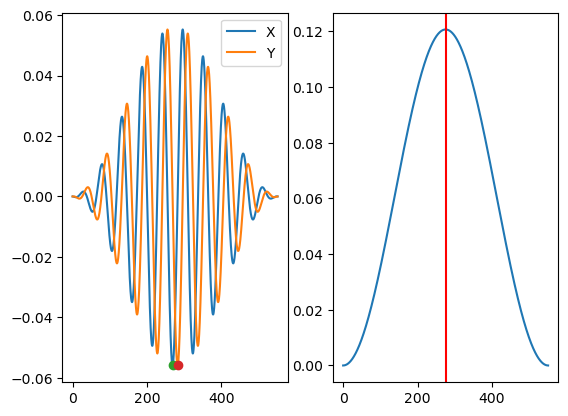

In [78]:
fig,(ax1,ax2) = plt.subplots(1,2,sharex=True)

top = 1


Ax = np.load(root+"400nm_2.2/TDSE_files/Ax.npy")
Ay = np.load(root+"400nm_2.2/TDSE_files/Ay.npy")

Ex = -np.gradient(Ax, dt)
Ey = -np.gradient(Ay, dt)


peak_indices_x, _ = find_peaks(np.abs(Ex))
peak_indices_y, _ = find_peaks(np.abs(Ey))


Ex_peaks_mag = np.abs(Ex[peak_indices_x])
Ey_peaks_mag = np.abs(Ey[peak_indices_y])


top_indices_x = np.argsort(Ex_peaks_mag)[-top:][::-1]
top_indices_y = np.argsort(Ey_peaks_mag)[-top:][::-1]




top_original_indices_x =np.sort(peak_indices_x[top_indices_x])
top_original_indices_y =np.sort(peak_indices_y[top_indices_y])


ax1.plot(t,Ex,label = "X")
ax1.plot(t,Ey,label = "Y")
ax1.plot(t[top_original_indices_x], Ex[top_original_indices_x], 'o')
ax1.plot(t[top_original_indices_y ], Ey[top_original_indices_y ], 'o')
ax1.legend()



Ip = 0.5
N = 10
wavelength = 400
w = 0.057 * 800/wavelength
I = 2.2e14 / 3.51E16

tau = 2*np.pi * N/w
envelope = np.sin(np.pi*t/tau)**2
I_profile = I * envelope
Up = I_profile/(4*w**2)


E_test_3 = []

for i in range(top):
    specific_peak = int((top_original_indices_x[i]+top_original_indices_y[i])/2)



    Up_val = Up[specific_peak]
    Up_val = np.max(Up) * 0.7055749427646534
    for i in range(15):
        E_temp = i * w - (Ip + Up_val)
        if E_temp>0 and E_temp<0.4:
          
            E_test_3.append((E_temp,i))

print(E_test_3)

ax2.plot(t,Up)
plt.axvline(t[specific_peak], color='r')

# Analytic Predictions